# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.447462e+01     1.329916e+01
 * time: 0.10528779029846191
     1     6.203500e+01     9.289325e+00
 * time: 0.11355876922607422
     2     5.573452e+01     1.318463e+01
 * time: 0.13289499282836914
     3     4.002128e+01     8.919860e+00
 * time: 0.15992093086242676
     4     2.918977e+01     6.976156e+00
 * time: 0.1834709644317627
     5     2.193254e+01     5.108194e+00
 * time: 0.20405983924865723
     6     1.872697e+01     5.488824e+00
 * time: 0.22574496269226074
     7     9.453711e+00     2.308581e+00
 * time: 0.24717497825622559
     8     8.233297e+00     2.647649e+00
 * time: 0.2641448974609375
     9     7.476685e+00     3.169080e+00
 * time: 0.3302309513092041
    10     7.358138e+00     4.054457e+00
 * time: 0.34577178955078125
    11     6.971162e+00     1.562499e+00
 * time: 0.3614928722381592
    12     6.730875e+00     2.383251e+00
 * time: 0.3763468265533447
    13     6.617790e+00     3.482490e+00
 * time: 0.39

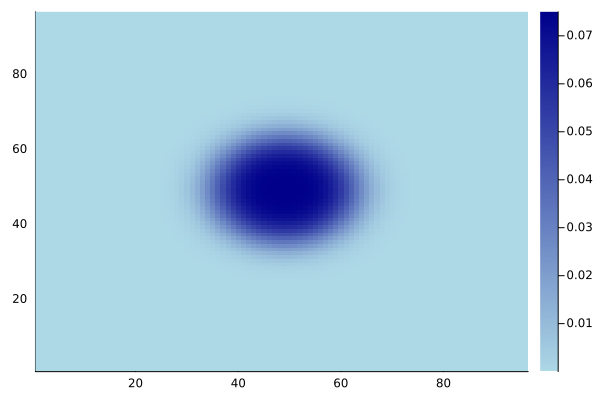

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)